## input

In [1]:
import pandas as pd
# Importing the data into a pandas data frame.
df = pd.read_csv(r'C:\Users\Morga\programsMG\TextMining\Tweets.csv')

In [2]:
pd.set_option('display.max_rows', None)
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
df['text'][17899]

'BREAKING NEWS: GM shares are currently trading below $1.00 at only $.88 per share!!'

## Preprocessing

In [4]:
#checking null values
print('sentiment null:',df['sentiment'].isnull().sum())
print('text null:',df['text'].isnull().sum())

sentiment null: 0
text null: 1


In [5]:
#Finding the null index number
x= df['text'].isnull()
i=0
for item in x:
    if item is False:
        i=i+1
    if item is True:
        break
print(i)

314


In [6]:
# Dropping the null value  
df.drop([314], inplace = True)

In [7]:
#checking the number of sentiment and finding the baseline
print(df['sentiment'].value_counts())
print('baseline',11118/sum(df['sentiment'].value_counts()))

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64
baseline 0.40458515283842794


In [8]:
#seperating the label
#placing the data into lists
y=df['sentiment'].values
M=df['text'].values

In [9]:
import re
#replacing words with repeated characters
X1=[]
for item in M:
    X1.append(re.sub(r'([a-zA-Z0-9_<>-])\1+', r'\1\1', item))

In [10]:
# using replace to change slang and misspellings
X=[]
for item in X1:
    iteml=item.lower()
    item1=iteml.replace('2day ','today ')
    item2=item1.replace('2moro ','tomorrow ')
    item3=item2.replace('2morrow ','tomorrow ')
    item4=item3.replace('2night ','tonight ')
    item5=item4.replace('2nite ','tonight ')
    item6=item5.replace('b-day ','birthday ')
    item7=item6.replace('b4 ','before ')
    item8=item7.replace('bb ','be back ')
    item9=item8.replace('bbl ','be back later ')
    item10=item9.replace('bc ','because ')
    item11=item10.replace('bday ','birthday ')
    item12=item11.replace('belive ','believe ')
    item13=item12.replace('bf ','boyfriend ')
    item14=item13.replace('bff ','best freind forever ')
    item15=item14.replace('brb ','be right back ')
    item16=item15.replace('bros ','bro ')
    item17=item16.replace('bs ','bullshit ')
    item18=item17.replace('btw ','by the way ')
    item19=item18.replace('dat ','that ')
    item20=item19.replace('doc ','doctor ')
    item21=item20.replace('docs ','doctor ')
    item22=item21.replace('hott ','hot ')
    item23=item22.replace('fb ','facebook ')
    item24=item23.replace('jk ','just kidding ')
    item25=item24.replace('jst ','just ')
    item26=item25.replace(' ng ',' nice game ')
    item27=item26.replace('nt ','nice try ')
    item28=item27.replace('ok ','okay ')
    item29=item28.replace('okayy ','okay ')
    item30=item29.replace('omgg ','omg ')
    item31=item30.replace('ppl ','people ')
    item32=item31.replace('tonite ','tonight ')
    item33=item32.replace(' u ',' you ')
    item34=item33.replace('u2 ','you too ')
    item35=item34.replace('ugg ','ugh ')
    item36=item35.replace('uggh ','ugh ')
    item37=item36.replace('uh ','ugh ')
    item38=item37.replace('uhh ','ugh ')
    item39=item38.replace('umm ','um ')
    item40=item39.replace('ur ','your ')
    item41=item40.replace('waah ','waa ')
    item42=item41.replace('wah ','waa ')
    item43=item42.replace('waay ','waa ')
    item44=item43.replace('xoxo ','xo ')
    item45=item44.replace('xx ','xo ')
    item46=item45.replace(' y ',' why ')
    item47=item46.replace('whyy ','why ')
    item48=item47.replace('yaay ','ya ')
    item49=item48.replace('yah ','ya ')
    item50=item49.replace('juss ','just ')
    item51=item50.replace('whassqoodd ','whats good') 
    item52=item51.replace('soo ','so ')
    X.append(item52)

In [11]:
#selecting the stop words
stopwords =['!','$','%','&',"'",'*','(',')','+', ',','-','.','/',':',';','<','=','>'
              ,'?','@','[','\\',']','^','_','`','{','|','}','~','¿','#bgt','#fail','#fb'
              ,'#ff','#followfriday','#hhrs','#judday','#sanctuarysunday','#starwarsday'
              ,'#twpp','>','_','_127','__','_b','_benson','_c','_carter','_d','_guy','_henrie'
              ,'_j','_m','_marie','_skies','_x','_xo','#']

## Vectorization

In [12]:
#Adding the created stopwords to sklearn stopword list.
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)

In [13]:
# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

In [14]:
# create a function for the tweet tokenizer from NLTK
def tok(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [15]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
# selecting porter stemmer and placing it in a function
# for use in sklearn's vectorizor
stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [16]:
# creating multiple vecorization options for testing using tfidf vectorizer, set minimum document frequency to 5
# and using stopwords or stopwords with sklearns stopwords
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=stop_words)
unigram_tfidf_vectorizer_Tweet_toke = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5
                                                      ,stop_words=stop_words,tokenizer=tok)
unigram_tfidf_vectorizer_no_stop = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=stopwords)
unigram_tfidf_vectorizer_Tweet_toke_no_stop = TfidfVectorizer(encoding='latin-1', use_idf=True
                                                              , min_df=5,stop_words=stopwords,tokenizer=tok)
unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem = TfidfVectorizer(encoding='latin-1', use_idf=True
                                                                   , min_df=5,stop_words=stopwords
                                                                   ,tokenizer=tok,analyzer=stemmed_words)
unigram_tfidf_vectorizer_Tweet_toke_stem = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5
                                                           ,stop_words=stopwords,tokenizer=tok,analyzer=stemmed_words)
ngram_tfidf_vectorizer_Tweet_toke_no_stop_ngram = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2)
                                                                  , use_idf=True, min_df=5
                                                                  ,stop_words=stopwords,tokenizer=tok)
ngram_tfidf_vectorizer_Tweet_toke_stem_ngram = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2)
                                                               , use_idf=True, min_df=5,stop_words=stopwords
                                                               ,tokenizer=tok,analyzer=stemmed_words)

In [17]:
# fitting and transforming the training data using the vectorizer
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X)

C:\Users\Morga\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bgt', 'fail', 'fb', 'ff', 'followfriday', 'hhrs', 'judday', 'sanctuarysunday', 'starwarsday', 'twpp'] not in stop_words.
  warnings.warn(


In [18]:
# fitting and transforming the training data using the vectorizer
X_train_tweet = unigram_tfidf_vectorizer_Tweet_toke.fit_transform(X)

In [19]:
# fitting and transforming the training data using the vectorizer
X_train_vec_no_stop = unigram_tfidf_vectorizer_no_stop.fit_transform(X)

In [20]:
# fitting and transforming the training data using the vectorizer
X_train_tweet_nostop = unigram_tfidf_vectorizer_Tweet_toke_no_stop.fit_transform(X)

In [21]:
# fitting and transforming the training data using the vectorizer
X_train_tweet_no_stop_stem = unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.fit_transform(X)

In [22]:
# fitting and transforming the training data using the vectorizer
X_train_tweet_stem = unigram_tfidf_vectorizer_Tweet_toke_stem.fit_transform(X)

In [23]:
# fitting and transforming the training data using the vectorizer
X_train_tweet_nostop_ngram = ngram_tfidf_vectorizer_Tweet_toke_no_stop_ngram.fit_transform(X)

In [24]:
# fitting and transforming the training data using the vectorizer
X_train_tweet_stem_ngram = ngram_tfidf_vectorizer_Tweet_toke_stem_ngram.fit_transform(X)

## Model creation and accuracy

In [25]:
# import the the models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
# initialize the models
svm1 = LinearSVC(C=1)
svm2 = LinearSVC(C=1)
svm3 = LinearSVC(C=1)
svm4 = LinearSVC(C=1)
svm5 = LinearSVC(C=1)
svm6 = LinearSVC(C=1)
svm7 = LinearSVC(C=1)
svm  = LinearSVC(C=1)
mnb1 = MultinomialNB()
mnb2 = MultinomialNB()
mnb3 = MultinomialNB()
mnb4 = MultinomialNB()
mnb5 = MultinomialNB()
mnb6 = MultinomialNB()
mnb7 = MultinomialNB()
mnb  = MultinomialNB()

## SVM Models

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

In [27]:
# use the training data to train the model
svm_model_vec = svm1.fit(X_train_vec,y)
#cross validation score
svm_cv_scores_vec = cross_val_score(svm1, X_train_vec, y, cv=10)
svm_cv_neu_f_scores_vec = cross_val_score(svm1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted'
                                                                                  , labels=['neutral']),cv=10)
svm_cv_neg_f_scores_vec = cross_val_score(svm1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted'
                                                                                  , labels=['negative']),cv=10)
svm_cv_pos_f_scores_vec = cross_val_score(svm1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted'
                                                                                  , labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_vec = round(np.mean(svm_cv_scores_vec),5)
svm_cv_neu_f_score_vec = round(np.mean(svm_cv_neu_f_scores_vec),5)
svm_cv_neg_f_score_vec = round(np.mean(svm_cv_neg_f_scores_vec),5)
svm_cv_pos_f_score_vec = round(np.mean(svm_cv_pos_f_scores_vec),5)
print('accuracy:',svm_cv_score_vec)
print('neutral f score:',svm_cv_neu_f_score_vec)
print('negative f score:',svm_cv_neg_f_score_vec)
print('positive f score:',svm_cv_pos_f_score_vec)

accuracy: 0.67911
neutral f score: 0.66086
negative f score: 0.64743
positive f score: 0.73202


In [28]:
#train model test model accuracy
svm_model_tweet = svm2.fit(X_train_tweet,y)
#cross validation score
svm_cv_scores_tweet = cross_val_score(svm2, X_train_tweet, y, cv=10)
svm_cv_neu_f_scores_tweet = cross_val_score(svm2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet = cross_val_score(svm2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet = cross_val_score(svm2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet = round(np.mean(svm_cv_scores_tweet),5)
svm_cv_neu_f_score_tweet = round(np.mean(svm_cv_neu_f_scores_tweet),5)
svm_cv_neg_f_score_tweet = round(np.mean(svm_cv_neg_f_scores_tweet),5)
svm_cv_pos_f_score_tweet = round(np.mean(svm_cv_pos_f_scores_tweet),5)
print('accuracy:',svm_cv_score_tweet)
print('neutral f score:',svm_cv_neu_f_score_tweet)
print('negative f score:',svm_cv_neg_f_score_tweet)
print('positive f score:',svm_cv_pos_f_score_tweet)

accuracy: 0.68068
neutral f score: 0.66223
negative f score: 0.65171
positive f score: 0.73133


In [29]:
#train model test model accuracy
svm_model_vec_no_stop = svm3.fit(X_train_vec_no_stop,y)
#cross validation score
svm_cv_scores_vec_no_stop = cross_val_score(svm3, X_train_vec_no_stop, y, cv=10)
svm_cv_neu_f_scores_vec_no_stop = cross_val_score(svm3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_vec_no_stop = cross_val_score(svm3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_vec_no_stop = cross_val_score(svm3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_vec_no_stop = round(np.mean(svm_cv_scores_vec_no_stop),5)
svm_cv_neu_f_score_vec_no_stop = round(np.mean(svm_cv_neu_f_scores_vec_no_stop),5)
svm_cv_neg_f_score_vec_no_stop = round(np.mean(svm_cv_neg_f_scores_vec_no_stop),5)
svm_cv_pos_f_score_vec_no_stop = round(np.mean(svm_cv_pos_f_scores_vec_no_stop),5)
print('accuracy:',svm_cv_score_vec_no_stop)
print('neutral f score:',svm_cv_neu_f_score_vec_no_stop)
print('negative f score:',svm_cv_neg_f_score_vec_no_stop)
print('positive f score:',svm_cv_pos_f_score_vec_no_stop)

accuracy: 0.68985
neutral f score: 0.66976
negative f score: 0.66232
positive f score: 0.74176


In [30]:
#train model
svm_model_tweet_no_stop = svm4.fit(X_train_tweet_nostop,y)
#cross validation score
svm_cv_scores_tweet_no_stop = cross_val_score(svm4, X_train_tweet_nostop, y, cv=10)
svm_cv_neu_f_scores_tweet_no_stop = cross_val_score(svm4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet_no_stop = cross_val_score(svm4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet_no_stop = cross_val_score(svm4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet_no_stop = round(np.mean(svm_cv_scores_tweet_no_stop),5)
svm_cv_neu_f_score_tweet_no_stop = round(np.mean(svm_cv_neu_f_scores_tweet_no_stop),5)
svm_cv_neg_f_score_tweet_no_stop = round(np.mean(svm_cv_neg_f_scores_tweet_no_stop),5)
svm_cv_pos_f_score_tweet_no_stop = round(np.mean(svm_cv_pos_f_scores_tweet_no_stop),5)
print('accuracy:',svm_cv_score_tweet_no_stop)
print('neutral f score:',svm_cv_neu_f_score_tweet_no_stop)
print('negative f score:',svm_cv_neg_f_score_tweet_no_stop)
print('positive f score:',svm_cv_pos_f_score_tweet_no_stop)

accuracy: 0.69265
neutral f score: 0.67283
negative f score: 0.66524
positive f score: 0.74417


In [31]:
#train model
svm_model_tweet_no_stop_stem = svm5.fit(X_train_tweet_no_stop_stem,y)
#cross validation score
svm_cv_scores_tweet_no_stop_stem = cross_val_score(svm5, X_train_tweet_no_stop_stem, y, cv=10)
svm_cv_neu_f_scores_tweet_no_stop_stem = cross_val_score(svm5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet_no_stop_stem = cross_val_score(svm5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet_no_stop_stem = cross_val_score(svm5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet_no_stop_stem = round(np.mean(svm_cv_scores_tweet_no_stop_stem),5)
svm_cv_neu_f_score_tweet_no_stop_stem = round(np.mean(svm_cv_neu_f_scores_tweet_no_stop_stem),5)
svm_cv_neg_f_score_tweet_no_stop_stem = round(np.mean(svm_cv_neg_f_scores_tweet_no_stop_stem),5)
svm_cv_pos_f_score_tweet_no_stop_stem = round(np.mean(svm_cv_pos_f_scores_tweet_no_stop_stem),5)
print('accuracy:',svm_cv_score_tweet_no_stop_stem)
print('neutral f score:',svm_cv_neu_f_score_tweet_no_stop_stem)
print('negative f score:',svm_cv_neg_f_score_tweet_no_stop_stem)
print('positive f score:',svm_cv_pos_f_score_tweet_no_stop_stem)

accuracy: 0.69294
neutral f score: 0.67359
negative f score: 0.66783
positive f score: 0.74147


In [32]:
#train model
svm_model_tweet_stem = svm6.fit(X_train_tweet_stem,y)
#cross validation score
svm_cv_scores_tweet_stem = cross_val_score(svm6, X_train_tweet_stem, y, cv=10)
svm_cv_neu_f_scores_tweet_stem = cross_val_score(svm6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet_stem = cross_val_score(svm6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet_stem = cross_val_score(svm6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet_stem = round(np.mean(svm_cv_scores_tweet_stem),5)
svm_cv_neu_f_score_tweet_stem = round(np.mean(svm_cv_neu_f_scores_tweet_stem),5)
svm_cv_neg_f_score_tweet_stem = round(np.mean(svm_cv_neg_f_scores_tweet_stem),5)
svm_cv_pos_f_score_tweet_stem = round(np.mean(svm_cv_pos_f_scores_tweet_stem),5)
print('accuracy:',svm_cv_score_tweet_stem)
print('neutral f score:',svm_cv_neu_f_score_tweet_stem)
print('negative f score:',svm_cv_neg_f_score_tweet_stem)
print('positive f score:',svm_cv_pos_f_score_tweet_stem)

accuracy: 0.69294
neutral f score: 0.67359
negative f score: 0.66783
positive f score: 0.74147


In [33]:
#train model
svm_model_tweet_nostop_ngram = svm7.fit(X_train_tweet_nostop_ngram,y)
#cross validation score
svm_cv_scores_tweet_nostop_ngram = cross_val_score(svm7, X_train_tweet_nostop_ngram, y, cv=10)
svm_cv_neu_f_scores_tweet_nostop_ngram  = cross_val_score(svm7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet_nostop_ngram  = cross_val_score(svm7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet_nostop_ngram  = cross_val_score(svm7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet_nostop_ngram = round(np.mean(svm_cv_scores_tweet_nostop_ngram),5)
svm_cv_neu_f_score_tweet_nostop_ngram = round(np.mean(svm_cv_neu_f_scores_tweet_nostop_ngram),5)
svm_cv_neg_f_score_tweet_nostop_ngram = round(np.mean(svm_cv_neg_f_scores_tweet_nostop_ngram),5)
svm_cv_pos_f_score_tweet_nostop_ngram = round(np.mean(svm_cv_pos_f_scores_tweet_nostop_ngram),5)
print('accuracy:',svm_cv_score_tweet_nostop_ngram)
print('neutral f score:',svm_cv_neu_f_score_tweet_nostop_ngram)
print('negative f score:',svm_cv_neg_f_score_tweet_nostop_ngram)
print('positive f score:',svm_cv_pos_f_score_tweet_nostop_ngram)

accuracy: 0.67442
neutral f score: 0.64918
negative f score: 0.65064
positive f score: 0.73052


In [34]:
#train model
svm_model_tweet_stem_ngram = svm.fit(X_train_tweet_stem_ngram,y)
#cross validation score
svm_cv_scores_tweet_stem_ngram = cross_val_score(svm, X_train_tweet_stem_ngram, y, cv=10)
svm_cv_neu_f_scores_tweet_stem_ngram  = cross_val_score(svm,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
svm_cv_neg_f_scores_tweet_stem_ngram  = cross_val_score(svm,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
svm_cv_pos_f_scores_tweet_stem_ngram  = cross_val_score(svm,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
svm_cv_score_tweet_stem_ngram = round(np.mean(svm_cv_scores_tweet_stem_ngram),5)
svm_cv_neu_f_score_tweet_stem_ngram = round(np.mean(svm_cv_neu_f_scores_tweet_stem_ngram),5)
svm_cv_neg_f_score_tweet_stem_ngram = round(np.mean(svm_cv_neg_f_scores_tweet_stem_ngram),5)
svm_cv_pos_f_score_tweet_stem_ngram = round(np.mean(svm_cv_pos_f_scores_tweet_stem_ngram),5)
print('accuracy:',svm_cv_score_tweet_stem_ngram)
print('neutral f score:',svm_cv_neu_f_score_tweet_stem_ngram)
print('negative f score:',svm_cv_neg_f_score_tweet_stem_ngram)
print('positive f score:',svm_cv_pos_f_score_tweet_stem_ngram)

accuracy: 0.69294
neutral f score: 0.67359
negative f score: 0.66783
positive f score: 0.74147


## MNB Models

In [35]:
# use the training data to train the model
mnb_model_vec = mnb1.fit(X_train_vec,y)
#cross validation score
mnb_cv_scores_vec = cross_val_score(mnb1, X_train_vec, y, cv=10)
mnb_cv_neu_f_scores_vec = cross_val_score(mnb1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_vec = cross_val_score(mnb1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_vec = cross_val_score(mnb1,X_train_vec, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_vec = round(np.mean(mnb_cv_scores_vec),5)
mnb_cv_neu_f_score_vec = round(np.mean(mnb_cv_neu_f_scores_vec),5)
mnb_cv_neg_f_score_vec = round(np.mean(mnb_cv_neg_f_scores_vec),5)
mnb_cv_pos_f_score_vec = round(np.mean(mnb_cv_pos_f_scores_vec),5)
print('accuracy:',mnb_cv_score_vec)
print('neutral f score:',mnb_cv_neu_f_score_vec)
print('negative f score:',mnb_cv_neg_f_score_vec)
print('positive f score:',mnb_cv_pos_f_score_vec)

accuracy: 0.64341
neutral f score: 0.65137
negative f score: 0.59399
positive f score: 0.67164


In [36]:
#train model test model accuracy
mnb_model_tweet = mnb2.fit(X_train_tweet,y)
#cross validation score
mnb_cv_scores_tweet = cross_val_score(mnb2, X_train_tweet, y, cv=10)
mnb_cv_neu_f_scores_tweet = cross_val_score(mnb2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet = cross_val_score(mnb2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet = cross_val_score(mnb2,X_train_tweet, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet = round(np.mean(mnb_cv_scores_tweet),5)
mnb_cv_neu_f_score_tweet = round(np.mean(mnb_cv_neu_f_scores_tweet),5)
mnb_cv_neg_f_score_tweet = round(np.mean(mnb_cv_neg_f_scores_tweet),5)
mnb_cv_pos_f_score_tweet = round(np.mean(mnb_cv_pos_f_scores_tweet),5)
print('accuracy:',mnb_cv_score_tweet)
print('neutral f score:',mnb_cv_neu_f_score_tweet)
print('negative f score:',mnb_cv_neg_f_score_tweet)
print('positive f score:',mnb_cv_pos_f_score_tweet)

accuracy: 0.64625
neutral f score: 0.65404
negative f score: 0.59786
positive f score: 0.67357


In [37]:
#train model test model accuracy
mnb_model_vec_no_stop = mnb3.fit(X_train_vec_no_stop,y)
#cross validation score
mnb_cv_scores_vec_no_stop = cross_val_score(mnb3, X_train_vec_no_stop, y, cv=10)
mnb_cv_neu_f_scores_vec_no_stop = cross_val_score(mnb3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_vec_no_stop = cross_val_score(mnb3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_vec_no_stop = cross_val_score(mnb3,X_train_vec_no_stop, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_vec_no_stop = round(np.mean(mnb_cv_scores_vec_no_stop),5)
mnb_cv_neu_f_score_vec_no_stop = round(np.mean(mnb_cv_neu_f_scores_vec_no_stop),5)
mnb_cv_neg_f_score_vec_no_stop = round(np.mean(mnb_cv_neg_f_scores_vec_no_stop),5)
mnb_cv_pos_f_score_vec_no_stop = round(np.mean(mnb_cv_pos_f_scores_vec_no_stop),5)
print('accuracy:',mnb_cv_score_tweet)
print('neutral f score:',mnb_cv_neu_f_score_tweet)
print('negative f score:',mnb_cv_neg_f_score_tweet)
print('positive f score:',mnb_cv_pos_f_score_tweet)

accuracy: 0.64625
neutral f score: 0.65404
negative f score: 0.59786
positive f score: 0.67357


In [38]:
#train model
mnb_model_tweet_no_stop = mnb4.fit(X_train_tweet_nostop,y)
#cross validation score
mnb_cv_scores_tweet_no_stop = cross_val_score(mnb4, X_train_tweet_nostop, y, cv=10)
mnb_cv_neu_f_scores_tweet_no_stop = cross_val_score(mnb4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet_no_stop = cross_val_score(mnb4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet_no_stop = cross_val_score(mnb4,X_train_tweet_nostop, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet_no_stop = round(np.mean(mnb_cv_scores_tweet_no_stop),5)
mnb_cv_neu_f_score_tweet_no_stop = round(np.mean(mnb_cv_neu_f_scores_tweet_no_stop),5)
mnb_cv_neg_f_score_tweet_no_stop = round(np.mean(mnb_cv_neg_f_scores_tweet_no_stop),5)
mnb_cv_pos_f_score_tweet_no_stop = round(np.mean(mnb_cv_pos_f_scores_tweet_no_stop),5)
print('accuracy:',mnb_cv_score_tweet_no_stop)
print('neutral f score:',mnb_cv_neu_f_score_tweet_no_stop)
print('negative f score:',mnb_cv_neg_f_score_tweet_no_stop)
print('positive f score:',mnb_cv_pos_f_score_tweet_no_stop)

accuracy: 0.64523
neutral f score: 0.66038
negative f score: 0.58352
positive f score: 0.66978


In [39]:
#train model
mnb_model_tweet_no_stop_stem = mnb5.fit(X_train_tweet_no_stop_stem,y)
#cross validation score
mnb_cv_scores_tweet_no_stop_stem = cross_val_score(mnb5, X_train_tweet_no_stop_stem, y, cv=10)
mnb_cv_neu_f_scores_tweet_no_stop_stem = cross_val_score(mnb5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet_no_stop_stem = cross_val_score(mnb5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet_no_stop_stem = cross_val_score(mnb5,X_train_tweet_no_stop_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet_no_stop_stem = round(np.mean(mnb_cv_scores_tweet_no_stop_stem),5)
mnb_cv_neu_f_score_tweet_no_stop_stem = round(np.mean(mnb_cv_neu_f_scores_tweet_no_stop_stem),5)
mnb_cv_neg_f_score_tweet_no_stop_stem = round(np.mean(mnb_cv_neg_f_scores_tweet_no_stop_stem),5)
mnb_cv_pos_f_score_tweet_no_stop_stem = round(np.mean(mnb_cv_pos_f_scores_tweet_no_stop_stem),5)
print('accuracy:',mnb_cv_score_tweet_no_stop_stem)
print('neutral f score:',mnb_cv_neu_f_score_tweet_no_stop_stem)
print('negative f score:',mnb_cv_neg_f_score_tweet_no_stop_stem)
print('positive f score:',mnb_cv_pos_f_score_tweet_no_stop_stem)

accuracy: 0.64145
neutral f score: 0.6558
negative f score: 0.57951
positive f score: 0.66782


In [40]:
#train model
mnb_model_tweet_stem = mnb6.fit(X_train_tweet_stem,y)
#cross validation score
mnb_cv_scores_tweet_stem = cross_val_score(mnb6, X_train_tweet_stem, y, cv=10)
mnb_cv_neu_f_scores_tweet_stem = cross_val_score(mnb6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet_stem = cross_val_score(mnb6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet_stem = cross_val_score(mnb6,X_train_tweet_stem, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet_stem = round(np.mean(mnb_cv_scores_tweet_stem),5)
mnb_cv_neu_f_score_tweet_stem = round(np.mean(mnb_cv_neu_f_scores_tweet_stem),5)
mnb_cv_neg_f_score_tweet_stem = round(np.mean(mnb_cv_neg_f_scores_tweet_stem),5)
mnb_cv_pos_f_score_tweet_stem = round(np.mean(mnb_cv_pos_f_scores_tweet_stem),5)
print('accuracy:',mnb_cv_score_tweet_stem)
print('neutral f score:',mnb_cv_neu_f_score_tweet_stem)
print('negative f score:',mnb_cv_neg_f_score_tweet_stem)
print('positive f score:',mnb_cv_pos_f_score_tweet_stem)

accuracy: 0.64145
neutral f score: 0.6558
negative f score: 0.57951
positive f score: 0.66782


In [41]:
#train model
mnb_model_tweet_nostop_ngram = mnb7.fit(X_train_tweet_nostop_ngram,y)
#cross validation score
mnb_cv_scores_tweet_nostop_ngram = cross_val_score(mnb7, X_train_tweet_nostop_ngram, y, cv=10)
mnb_cv_neu_f_scores_tweet_nostop_ngram = cross_val_score(mnb7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet_nostop_ngram = cross_val_score(mnb7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet_nostop_ngram = cross_val_score(mnb7,X_train_tweet_nostop_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet_nostop_ngram = round(np.mean(mnb_cv_scores_tweet_nostop_ngram),5)
mnb_cv_neu_f_score_tweet_nostop_ngram = round(np.mean(mnb_cv_neu_f_scores_tweet_nostop_ngram),5)
mnb_cv_neg_f_score_tweet_nostop_ngram = round(np.mean(mnb_cv_neg_f_scores_tweet_nostop_ngram),5)
mnb_cv_pos_f_score_tweet_nostop_ngram = round(np.mean(mnb_cv_pos_f_scores_tweet_nostop_ngram),5)
print('accuracy:',mnb_cv_score_tweet_nostop_ngram)
print('neutral f score:',mnb_cv_neu_f_score_tweet_nostop_ngram)
print('negative f score:',mnb_cv_neg_f_score_tweet_nostop_ngram)
print('positive f score:',mnb_cv_pos_f_score_tweet_nostop_ngram)

accuracy: 0.65258
neutral f score: 0.66323
negative f score: 0.59649
positive f score: 0.68136


In [42]:
#train model
mnb_model_tweet_stem_ngram = mnb7.fit(X_train_tweet_stem_ngram,y)
#cross validation score
mnb_cv_scores_tweet_stem_ngram = cross_val_score(mnb7, X_train_tweet_stem_ngram, y, cv=10)
mnb_cv_neu_f_scores_tweet_stem_ngram = cross_val_score(mnb7,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=10)
mnb_cv_neg_f_scores_tweet_stem_ngram = cross_val_score(mnb7,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=10)
mnb_cv_pos_f_scores_tweet_stem_ngram = cross_val_score(mnb7,X_train_tweet_stem_ngram, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=10)
#finding the overall average metrics.
mnb_cv_score_tweet_stem_ngram = round(np.mean(mnb_cv_scores_tweet_nostop_ngram),5)
mnb_cv_neu_f_score_tweet_stem_ngram = round(np.mean(mnb_cv_neu_f_scores_tweet_stem_ngram),5)
mnb_cv_neg_f_score_tweet_stem_ngram = round(np.mean(mnb_cv_neg_f_scores_tweet_stem_ngram),5)
mnb_cv_pos_f_score_tweet_stem_ngram = round(np.mean(mnb_cv_pos_f_scores_tweet_stem_ngram),5)
print('accuracy:',mnb_cv_score_tweet_stem_ngram)
print('neutral f score:',mnb_cv_neu_f_score_tweet_stem_ngram)
print('negative f score:',mnb_cv_neg_f_score_tweet_stem_ngram)
print('positive f score:',mnb_cv_pos_f_score_tweet_stem_ngram)

accuracy: 0.65258
neutral f score: 0.6558
negative f score: 0.57951
positive f score: 0.66782


## Graph

In [43]:
# creating a dictionary of all the accuracys
svmmnbacc = {'svm_cv_score_vec':svm_cv_score_vec
             ,'svm_cv_score_tweet':svm_cv_score_tweet
             ,'svm_cv_score_vec_no_stop':svm_cv_score_vec_no_stop
             ,'svm_cv_score_tweet_no_stop':svm_cv_score_tweet_no_stop
             ,'svm_cv_score_tweet_no_stop_stem':svm_cv_score_tweet_no_stop_stem
             ,'svm_cv_score_tweet_stem':svm_cv_score_tweet_stem
             ,'svm_cv_score_tweet_nostop_ngram':svm_cv_score_tweet_nostop_ngram
             ,'svm_cv_score_tweet_stem_ngram':svm_cv_score_tweet_stem_ngram
             ,'mnb_cv_score_vec':mnb_cv_score_vec
             ,'mnb_cv_score_tweet':mnb_cv_score_tweet
             ,'mnb_cv_score_vec_no_stop':mnb_cv_score_vec_no_stop
             ,'mnb_cv_score_tweet_no_stop':mnb_cv_score_tweet_no_stop
             ,'mnb_cv_score_tweet_no_stop_stem':mnb_cv_score_tweet_no_stop_stem
             ,'mnb_cv_score_tweet_stem':mnb_cv_score_tweet_stem
             ,'mnb_cv_score_tweet_nostop_ngram':mnb_cv_score_tweet_nostop_ngram
             ,'mnb_cv_score_tweet_stem_ngram':mnb_cv_score_tweet_stem_ngram
    
}

In [44]:
# creating a dictionary of all the neutral F1-scores
svmmnbneuf = {'svm_cv_score_vec':svm_cv_neu_f_score_vec
             ,'svm_cv_score_tweet':svm_cv_neu_f_score_tweet
             ,'svm_cv_score_vec_no_stop':svm_cv_neu_f_score_vec_no_stop
             ,'svm_cv_score_tweet_no_stop':svm_cv_neu_f_score_tweet_no_stop
             ,'svm_cv_score_tweet_no_stop_stem':svm_cv_neu_f_score_tweet_no_stop_stem
             ,'svm_cv_score_tweet_stem':svm_cv_neu_f_score_tweet_stem
             ,'svm_cv_score_tweet_nostop_ngram':svm_cv_neu_f_score_tweet_nostop_ngram
             ,'svm_cv_neu_f_score_tweet_stem_ngram':svm_cv_neu_f_score_tweet_stem_ngram
             ,'mnb_cv_score_vec':mnb_cv_neu_f_score_vec
             ,'mnb_cv_score_tweet':mnb_cv_neu_f_score_tweet
             ,'mnb_cv_score_vec_no_stop':mnb_cv_neu_f_score_vec_no_stop
             ,'mnb_cv_score_tweet_no_stop':mnb_cv_neu_f_score_tweet_no_stop
             ,'mnb_cv_score_tweet_no_stop_stem':mnb_cv_neu_f_score_tweet_no_stop_stem
             ,'mnb_cv_score_tweet_stem':mnb_cv_neu_f_score_tweet_stem
             ,'mnb_cv_score_tweet_nostop_ngram':mnb_cv_neu_f_score_tweet_nostop_ngram
             ,'mnb_cv_neu_f_score_tweet_stem_ngram':mnb_cv_neu_f_score_tweet_stem_ngram
            
    
}

In [45]:
# creating a dictionary of all the negative F1-scores
svmmnbnegf = {'svm_cv_score_vec':svm_cv_neg_f_score_vec
             ,'svm_cv_score_tweet':svm_cv_neg_f_score_tweet
             ,'svm_cv_score_vec_no_stop':svm_cv_neg_f_score_vec_no_stop
             ,'svm_cv_score_tweet_no_stop':svm_cv_neg_f_score_tweet_no_stop
             ,'svm_cv_score_tweet_no_stop_stem':svm_cv_neg_f_score_tweet_no_stop_stem
             ,'svm_cv_score_tweet_stem':svm_cv_neg_f_score_tweet_stem
             ,'svm_cv_score_tweet_nostop_ngram':svm_cv_neg_f_score_tweet_nostop_ngram
             ,'svm_cv_neg_f_score_tweet_stem_ngram':svm_cv_neg_f_score_tweet_stem_ngram
             ,'mnb_cv_score_vec':mnb_cv_neg_f_score_vec
             ,'mnb_cv_score_tweet':mnb_cv_neg_f_score_tweet
             ,'mnb_cv_score_vec_no_stop':mnb_cv_neg_f_score_vec_no_stop
             ,'mnb_cv_score_tweet_no_stop':mnb_cv_neg_f_score_tweet_no_stop
             ,'mnb_cv_score_tweet_no_stop_stem':mnb_cv_neg_f_score_tweet_no_stop_stem
             ,'mnb_cv_score_tweet_stem':mnb_cv_neg_f_score_tweet_stem
             ,'mnb_cv_score_tweet_nostop_ngram':mnb_cv_neg_f_score_tweet_nostop_ngram
             ,'mnb_cv_neg_f_score_tweet_stem_ngram':mnb_cv_neg_f_score_tweet_stem_ngram
    
}

In [46]:
# creating a dictionary of all the postive F1-scores
svmmnbposf = {'svm_cv_score_vec':svm_cv_pos_f_score_vec
             ,'svm_cv_score_tweet':svm_cv_pos_f_score_tweet
             ,'svm_cv_score_vec_no_stop':svm_cv_pos_f_score_vec_no_stop
             ,'svm_cv_score_tweet_no_stop':svm_cv_pos_f_score_tweet_no_stop
             ,'svm_cv_score_tweet_no_stop_stem':svm_cv_pos_f_score_tweet_no_stop_stem
             ,'svm_cv_score_tweet_stem':svm_cv_pos_f_score_tweet_stem
             ,'svm_cv_score_tweet_nostop_ngram':svm_cv_pos_f_score_tweet_nostop_ngram
             ,'svm_cv_pos_f_score_tweet_stem_ngram':svm_cv_pos_f_score_tweet_stem_ngram
             ,'mnb_cv_score_vec':mnb_cv_pos_f_score_vec
             ,'mnb_cv_score_tweet':mnb_cv_pos_f_score_tweet
             ,'mnb_cv_score_vec_no_stop':mnb_cv_pos_f_score_vec_no_stop
             ,'mnb_cv_score_tweet_no_stop':mnb_cv_pos_f_score_tweet_no_stop
             ,'mnb_cv_score_tweet_no_stop_stem':mnb_cv_pos_f_score_tweet_no_stop_stem
             ,'mnb_cv_score_tweet_stem':mnb_cv_pos_f_score_tweet_stem
             ,'mnb_cv_score_tweet_nostop_ngram':mnb_cv_pos_f_score_tweet_nostop_ngram
             ,'mnb_cv_pos_f_score_tweet_stem_ngram':mnb_cv_pos_f_score_tweet_stem_ngram
    
}

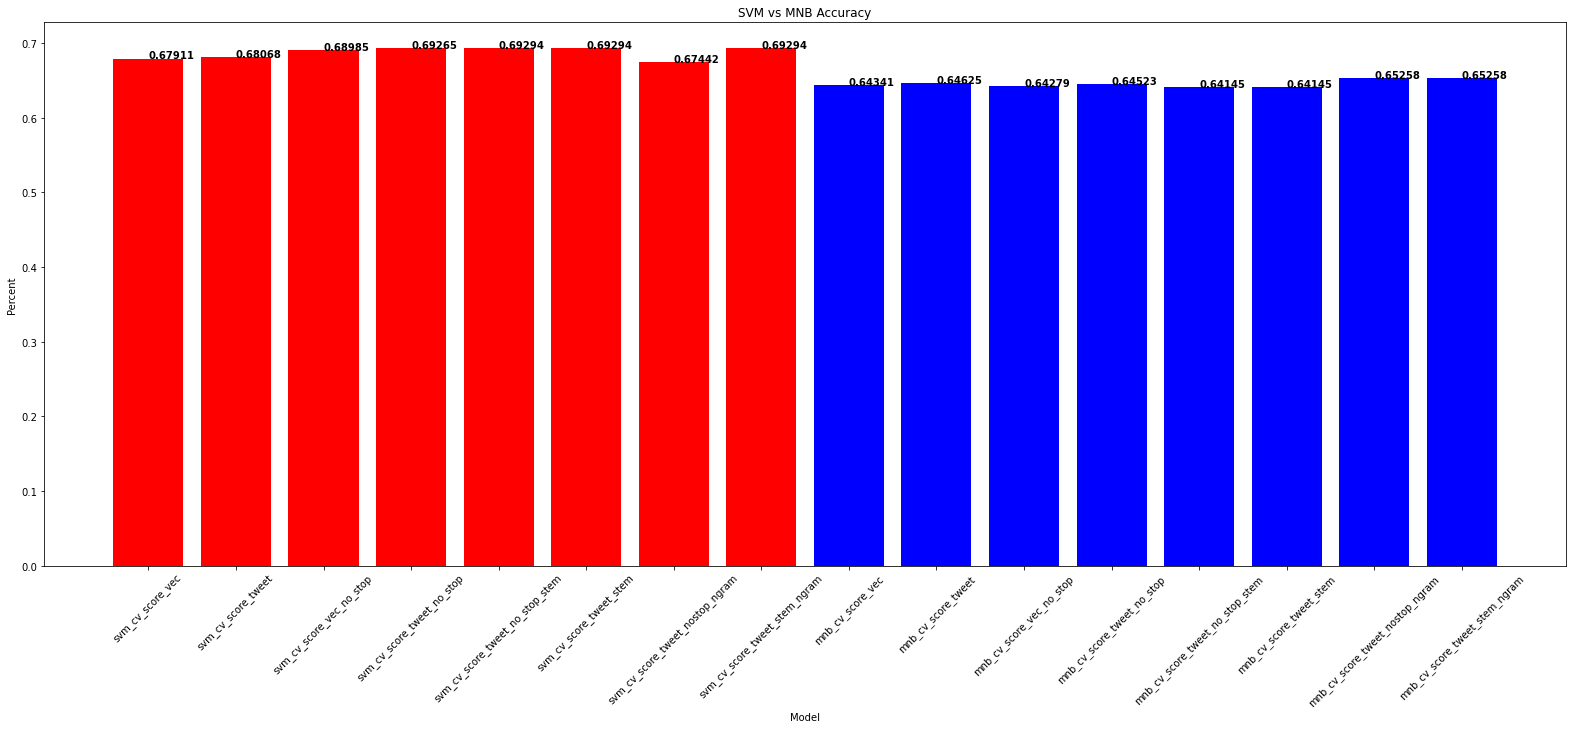

In [47]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(svmmnbacc.values())
names = list(svmmnbacc.keys())
colors = ['red','red','red','red','red','red','red','red'
          ,'blue','blue','blue','blue','blue','blue','blue','blue'
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('SVM vs MNB Accuracy')

addlabels(values)
plt.show()

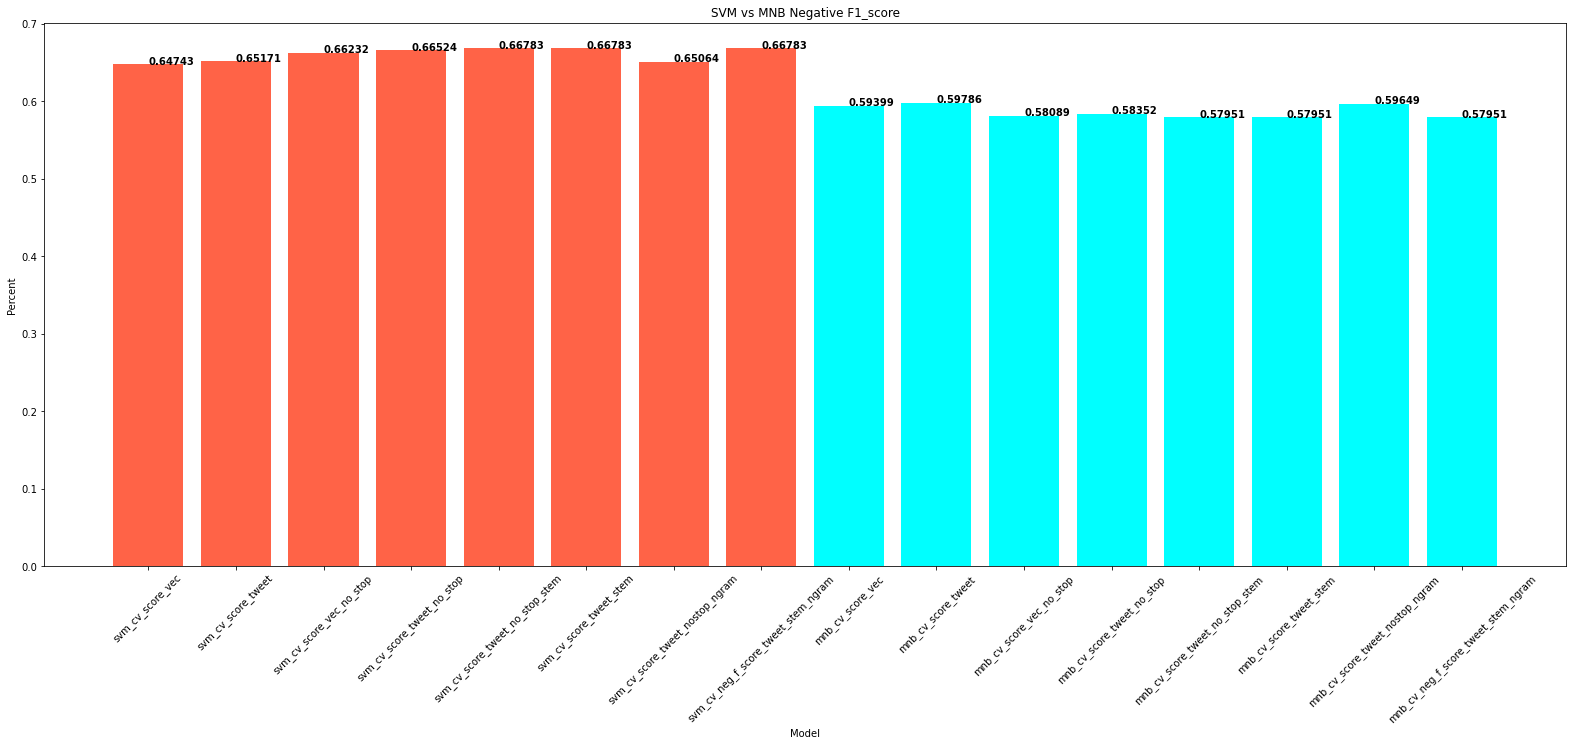

In [48]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(svmmnbnegf.values())
names = list(svmmnbnegf.keys())
colors = ['tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato'
          ,'cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('SVM vs MNB Negative F1_score')

addlabels(values)
plt.show()

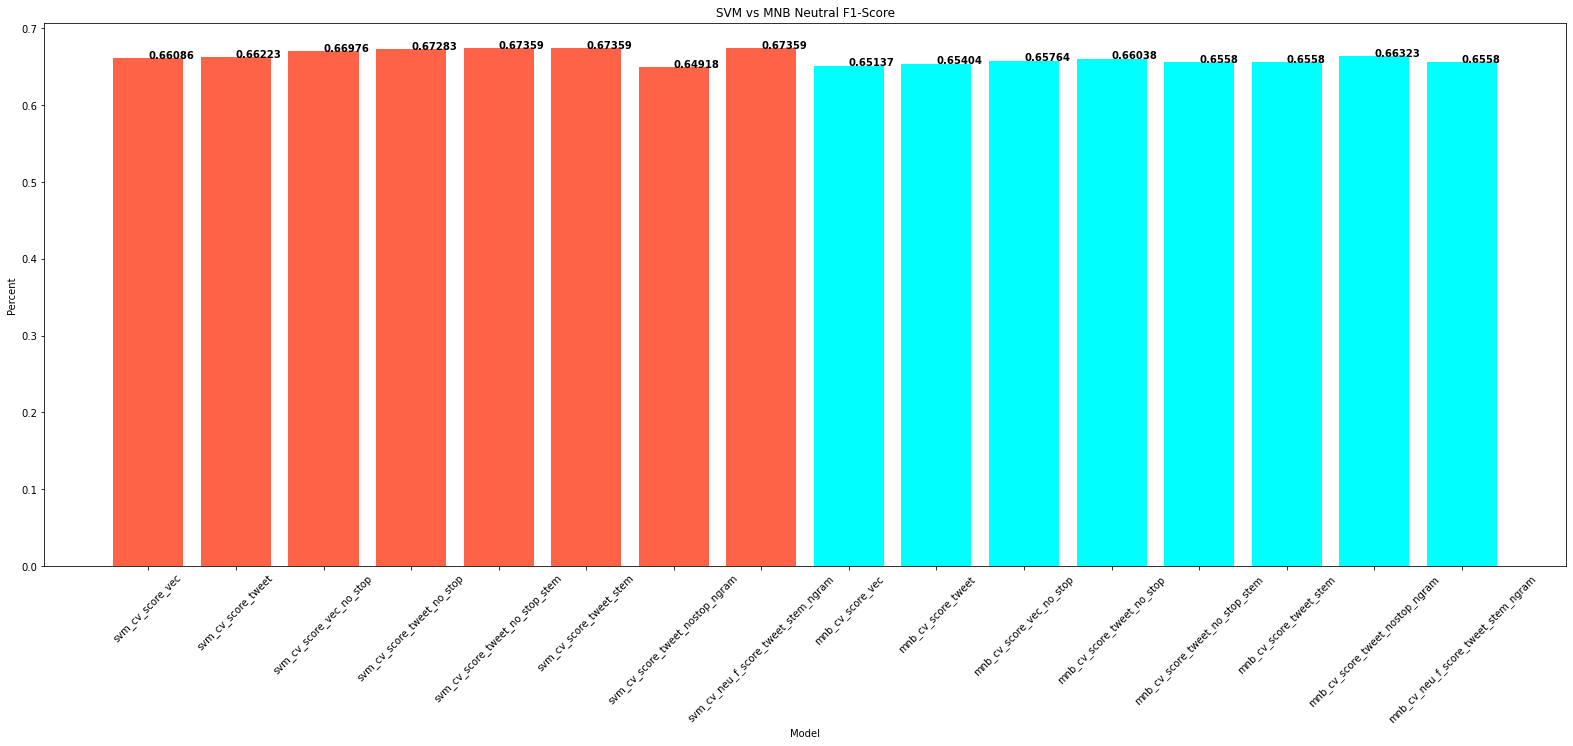

In [49]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(svmmnbneuf.values())
names = list(svmmnbneuf.keys())
colors = ['tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato'
          ,'cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('SVM vs MNB Neutral F1-Score')

addlabels(values)
plt.show()

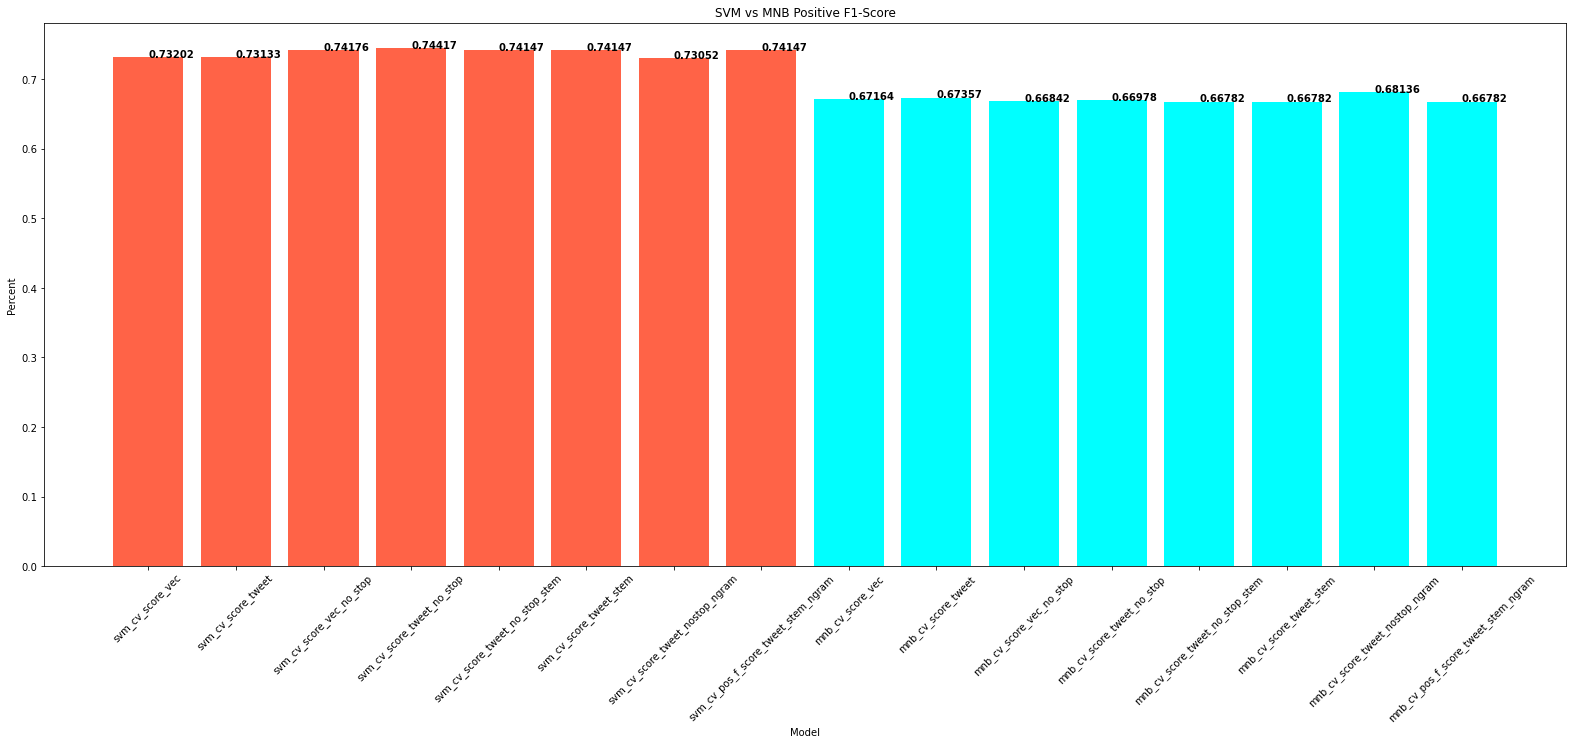

In [50]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(svmmnbposf.values())
names = list(svmmnbposf.keys())
colors = ['tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato'
          ,'cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('SVM vs MNB Positive F1-Score')

addlabels(values)
plt.show()